In [1]:
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_classes =2, n_samples =400,n_clusters_per_class=1, random_state= 3 ,n_features= 2, n_informative= 2,n_redundant= 0 )

In [3]:
y[y==0] = -1

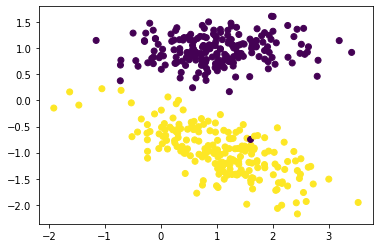

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
import numpy as np

In [6]:
class SVM:

  def __init__(self,c=1):
    self.c = c
    self.w = 0
    self.b = 0

  def hinge_loss(self,w,b,x,y):
    loss = 0.0
    loss += 0.5*np.dot(w,w.T)

    for i in range(x.shape[0]):
      ti = y[i]*(np.dot(w,x[i].T)+b)
      loss += self.c*max(0,1-ti)  
    return loss[0][0]

  def fit(self,x,y,batch_size=100,learning_rate=0.01,maxItr=30):
    no_of_samples = x.shape[0]
    no_of_features = x.shape[1]
    n = learning_rate
    c = self.c
    w = np.zeros((1,no_of_features))
    bias = 0

    losses = []
    for i in range(maxItr):
      losses.append(self.hinge_loss(w,bias,x,y))
      ids = np.arange(no_of_samples)
      np.random.shuffle(ids)

      for batch_start in (0,no_of_samples,batch_size):
        gradw = 0
        gradb = 0

        for j in range(batch_start,batch_start+batch_size):
          if j < no_of_samples:
            temp = ids[j]
            ti = y[temp]*(np.dot(w,x[temp].T)+bias)
            if ti <= 1:
              gradw += c*y[temp]*x[temp]
              gradb += c*y[temp]

        w -= n*w - n*gradw
        bias += n*gradb

    self.w = w
    self.b = bias
    return w,bias,losses                      

In [7]:
mySVM = SVM()
w,b,losses = mySVM.fit(x,y)

In [8]:
losses[0],losses[-1]

(400.0, 15.587227116523685)

In [9]:
len(losses)

30

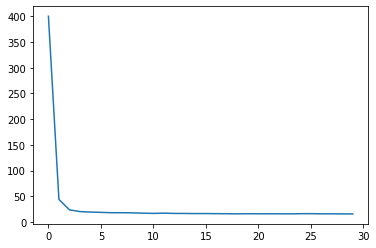

In [10]:
plt.plot(losses)
plt.show()

In [11]:
w,b = mySVM.w,mySVM.b
print(w,b)

[[-0.32679138 -1.94952674]] 0.42000000000000004


In [12]:
def plotHyperplane(w1,w2,b):
  plt.figure(figsize=(10,10))
  x_1 = np.linspace(-2,4,10)
  x_2 = -(w1*x_1 + b)/w2
  x_p = -(w1*x_1 + b + 1)/w2
  x_n = -(w1*x_1 + b - 1)/w2
  plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
  plt.plot(x_1,x_2,label="Optimal Hyperplane WX+B=0")
  plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
  plt.scatter(x[:,0],x[:,1],c=y)
  plt.legend()
  plt.show()

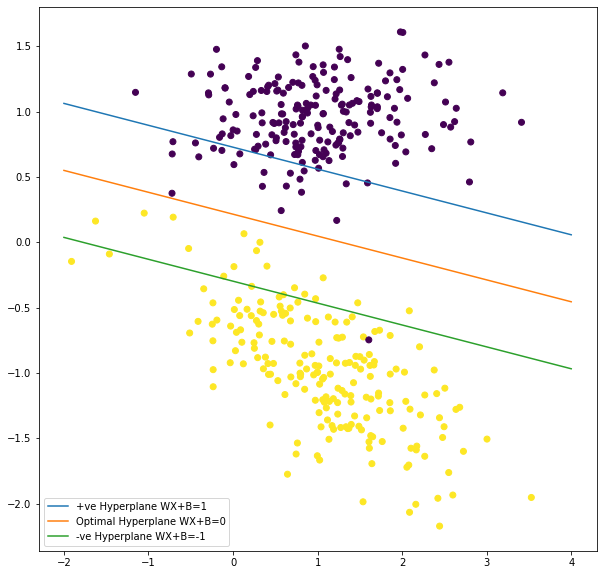

In [13]:
plotHyperplane(w[0][0],w[0][1],b)

In [14]:
#Effect of increasing c -
mySVM3 = SVM(c=100)
w,b,losses = mySVM3.fit(x,y)

In [15]:
w,b

(array([[ -7.93001501, -34.95680924]]), 5.0)

In [16]:
losses[0],losses[-1]

(40000.0, 2610.266521212106)

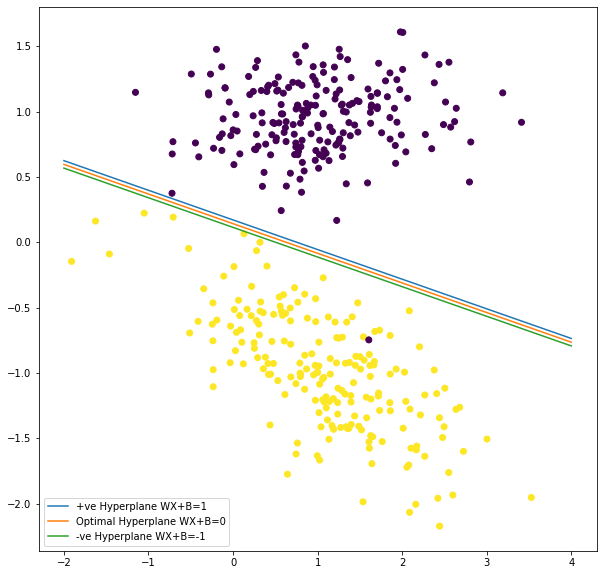

In [17]:
plotHyperplane(w[0][0],w[0][1],b)